In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Iran_Khodro.csv')

In [ ]:
df

,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>
0,Iran Khodro,20240420,3160.0,3196.0,3114.0,3155.0,1.607406e+12,509413682,10171,D,2966.0,3180.0
1,Iran Khodro,20240417,2959.0,2976.0,2921.0,2966.0,5.428344e+11,182989256,3972,D,2947.0,2935.0
2,Iran Khodro,20240416,2946.0,2969.0,2946.0,2947.0,9.746758e+11,330732829,5002,D,2975.0,2962.0
3,Iran Khodro,20240415,2975.0,2975.0,2970.0,2975.0,2.995555e+11,100691590,1639,D,2946.0,2975.0
4,Iran Khodro,20240414,2928.0,2928.0,2928.0,2946.0,4.232523e+10,14455337,447,D,2957.0,2928.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5300,Iran Khodro,20010331,2840.0,2848.0,2800.0,2838.0,5.000684e+08,177362,161,D,2849.0,2838.0
5301,Iran Khodro,20010328,2800.0,2849.0,2796.0,2849.0,2.275667e+08,80676,104,D,2795.0,2849.0
5302,Iran Khodro,20010327,2795.0,2800.0,2795.0,2795.0,4.664051e+08,166600,120,D,2798.0,2795.0
5303,Iran Khodro,20010326,2801.0,2810.0,2797.0,2798.0,2.705952e+08,96613,98,D,2800.0,2798.0


In [ ]:
df.rename(columns={'<HIGH>':'High','<LOW>':'Low','<CLOSE>':'Close','<OPEN>':'Open','<VOL>':'Volume'},inplace=True)


In [ ]:
df['<DTYYYYMMDD>']=pd.to_datetime(df['<DTYYYYMMDD>'], format='%Y%m%d')

In [ ]:
df.set_index('<DTYYYYMMDD>',inplace=True)

In [ ]:
df.sort_index(ascending=True,inplace=True)

In [ ]:
df

,<TICKER>,<FIRST>,High,Low,Close,<VALUE>,Volume,<OPENINT>,<PER>,Open,<LAST>
<DTYYYYMMDD>,,,,,,,,,,,
2001-03-25,Iran Khodro,2798.0,2802.0,2798.0,2800.0,3.103681e+08,110870,115,D,2798.0,2800.0
2001-03-26,Iran Khodro,2801.0,2810.0,2797.0,2798.0,2.705952e+08,96613,98,D,2800.0,2798.0
2001-03-27,Iran Khodro,2795.0,2800.0,2795.0,2795.0,4.664051e+08,166600,120,D,2798.0,2795.0
2001-03-28,Iran Khodro,2800.0,2849.0,2796.0,2849.0,2.275667e+08,80676,104,D,2795.0,2849.0
2001-03-31,Iran Khodro,2840.0,2848.0,2800.0,2838.0,5.000684e+08,177362,161,D,2849.0,2838.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-14,Iran Khodro,2928.0,2928.0,2928.0,2946.0,4.232523e+10,14455337,447,D,2957.0,2928.0
2024-04-15,Iran Khodro,2975.0,2975.0,2970.0,2975.0,2.995555e+11,100691590,1639,D,2946.0,2975.0
2024-04-16,Iran Khodro,2946.0,2969.0,2946.0,2947.0,9.746758e+11,330732829,5002,D,2975.0,2962.0


In [ ]:
df.isnull().sum()

<TICKER>     0
<FIRST>      0
High         0
Low          0
Close        0
<VALUE>      0
Volume       0
<OPENINT>    0
<PER>        0
Open         0
<LAST>       0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_scaled=scaler.fit_transform(df['Close'].values.reshape(-1,1))

### Defining sequence length (60 days)

In [ ]:
X=[]
y=[]
for i in range(60,len(df_scaled)):
        X.append(df_scaled[i-60:i,0])
        y.append(df_scaled[i,0])

In [ ]:
train_size=int(len(X)*0.8)
test_size=len(X)-train_size
X_train, X_test= X[:train_size],X[train_size:]
y_train,y_test=y[:train_size],y[train_size:]


In [ ]:
X_train , y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, AdditiveAttention, Permute, Reshape, Multiply

model = Sequential()

# Adding LSTM layers with return_sequences=True
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))

# Adding self-attention mechanism
# The attention mechanism
attention = AdditiveAttention(name='attention_weight')
# Permute and reshape for compatibility
model.add(Permute((2, 1)))
model.add(Reshape((-1, X_train.shape[1])))
attention_result = attention([model.output, model.output])
multiply_layer = Multiply()([model.output, attention_result])
# Return to original shape
model.add(Permute((2, 1)))
model.add(Reshape((-1, 50)))

# Adding a Flatten layer before the final Dense layer
model.add(tf.keras.layers.Flatten())

# Final Dense layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)


Epoch 1/100
135/135 [==============================] - 7s 15ms/step - loss: 0.0029 - val_loss: 6.4314e-04
Epoch 2/100
135/135 [==============================] - 1s 9ms/step - loss: 7.9496e-04 - val_loss: 8.8954e-04
Epoch 3/100
135/135 [==============================] - 1s 9ms/step - loss: 5.8184e-04 - val_loss: 5.2471e-04
Epoch 4/100
135/135 [==============================] - 1s 10ms/step - loss: 4.9597e-04 - val_loss: 0.0013
Epoch 5/100
135/135 [==============================] - 2s 13ms/step - loss: 5.4673e-04 - val_loss: 4.3902e-04
Epoch 6/100
135/135 [==============================] - 2s 12ms/step - loss: 3.8663e-04 - val_loss: 4.3990e-04
Epoch 7/100
135/135 [==============================] - 1s 9ms/step - loss: 3.9424e-04 - val_loss: 4.9609e-04
Epoch 8/100
135/135 [==============================] - 1s 9ms/step - loss: 3.3487e-04 - val_loss: 3.1740e-04
Epoch 9/100
135/135 [==============================] - 1s 9ms/step - loss: 3.1325e-04 - val_loss: 2.9297e-04
Epoch 10/100
135/135 [=

In [ ]:
from keras.layers import BatchNormalization

# Adding Dropout and Batch Normalization
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 permute (Permute)           (None, 50, 60)            0         
                                                                 
 reshape (Reshape)           (None, 50, 60)            0         
                                                                 
 permute_1 (Permute)         (None, 60, 50)            0         
                                                                 
 reshape_1 (Reshape)         (None, 60, 50)            0         
                                                                 
 flatten (Flatten)           (None, 3000)              0

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard, CSVLogger

# Callback to save the model periodically
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

# Callback to reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Callback for TensorBoard
tensorboard = TensorBoard(log_dir='./logs')

# Callback to log details to a CSV file
csv_logger = CSVLogger('training_log.csv')

# Combining all callbacks
callbacks_list = [early_stopping, model_checkpoint, reduce_lr, tensorboard, csv_logger]

# Fit the model with the callbacks
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/100
135/135 [==============================] - 8s 17ms/step - loss: 0.1934 - val_loss: 0.0277 - lr: 0.0010
Epoch 2/100
 13/135 [=>............................] - ETA: 1s - loss: 0.0225

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


135/135 [==============================] - 1s 10ms/step - loss: 0.0248 - val_loss: 0.0139 - lr: 0.0010
Epoch 3/100
135/135 [==============================] - 1s 10ms/step - loss: 0.0162 - val_loss: 0.0082 - lr: 0.0010
Epoch 4/100
135/135 [==============================] - 1s 11ms/step - loss: 0.0112 - val_loss: 0.0041 - lr: 0.0010
Epoch 5/100
135/135 [==============================] - 1s 10ms/step - loss: 0.0096 - val_loss: 0.0048 - lr: 0.0010
Epoch 6/100
135/135 [==============================] - 1s 10ms/step - loss: 0.0077 - val_loss: 0.0561 - lr: 0.0010
Epoch 7/100
135/135 [==============================] - 2s 15ms/step - loss: 0.0083 - val_loss: 0.0050 - lr: 0.0010
Epoch 8/100
135/135 [==============================] - 2s 13ms/step - loss: 0.0063 - val_loss: 0.0032 - lr: 0.0010
Epoch 9/100
135/135 [==============================] - 1s 10ms/step - loss: 0.0054 - val_loss: 0.0042 - lr: 0.0010
Epoch 10/100
135/135 [==============================] - 1s 10ms/step - loss: 0.0045 - val_lo

In [ ]:
# Convert X_test and y_test to Numpy arrays if they are not already
X_test = np.array(X_test)
y_test = np.array(y_test)

# Ensure X_test is reshaped similarly to how X_train was reshaped
# This depends on how you preprocessed the training data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Now evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)


33/33 [==============================] - 0s 5ms/step - loss: 0.0022
Test Loss:  0.002245449461042881


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Making predictions
y_pred = model.predict(X_test)

# Calculating MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)


33/33 [==============================] - 1s 5ms/step
Mean Absolute Error:  0.030610453563629483
Root Mean Square Error:  0.047386173549373134


In [ ]:
# Fetching the latest 60 days of AAPL stock data
data = df.tail(60)

# Select 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(4):  # Predicting 4 days
    # Get the prediction (next day)
    next_prediction = model.predict(current_batch)

    # Reshape the prediction to fit the batch dimension
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)

    # Append the prediction to the batch used for predicting
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)

    # Inverse transform the prediction to the original price scale
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

print("Predicted Stock Prices for the next 4 days: ", predicted_prices)


1/1 [==============================] - 0s 47ms/step
Predicted Stock Prices for the next 4 days:  [3106.801, 2971.7761, 2871.561, 2840.1912]


In [ ]:
!pip install mplfinance -qqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
data.index[-1]

Timestamp('2024-04-20 00:00:00')

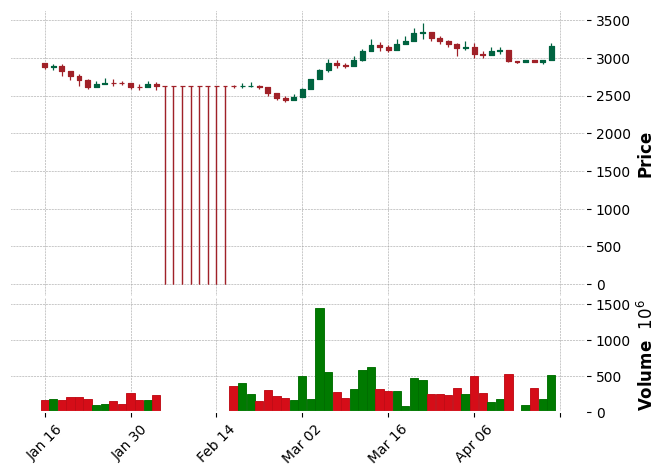

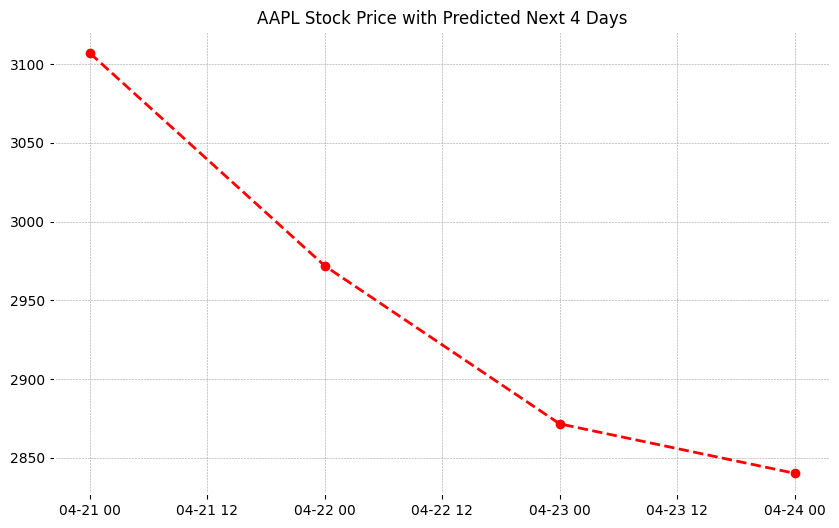

In [ ]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the fetched AAPL stock data
# Make sure it contains Open, High, Low, Close, and Volume columns

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Assuming 'predicted_prices' is your list of predicted prices for the next 4 days
predictions_df = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Plotting the actual data with mplfinance
mpf.plot(data, type='candle', style='charles', volume=True)

# Overlaying the predicted data
plt.figure(figsize=(10,6))
plt.plot(predictions_df.index, predictions_df['Close'], linestyle='dashed', marker='o', color='red')

plt.title("AAPL Stock Price with Predicted Next 4 Days")
plt.show()


In [ ]:
df

1/1 [==============================] - 0s 18ms/step


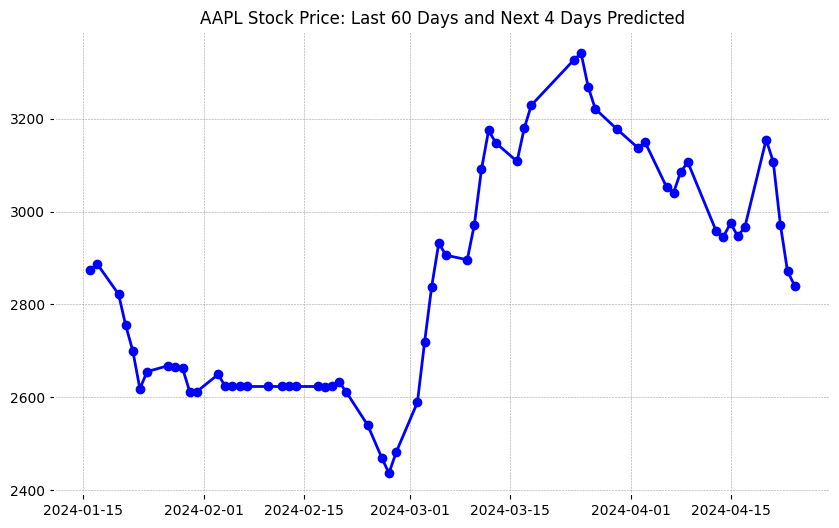

In [ ]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

# Fetch the latest 60 days of AAPL stock data
#data = yf.download('AAPL', period='64d', interval='1d') # Fetch 64 days to display last 60 days in the chart

# Select 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(4):  # Predicting 4 days
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Adding predictions to the DataFrame
predicted_data = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Combining both actual and predicted data
combined_data = pd.concat([data['Close'],predicted_data['Close']])
combined_data = combined_data[-64:] # Last 60 days of actual data + 4 days of predictions

# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(combined_data, linestyle='-', marker='o', color='blue')
plt.title("AAPL Stock Price: Last 60 Days and Next 4 Days Predicted")
plt.show()


1/1 [==============================] - 0s 35ms/step


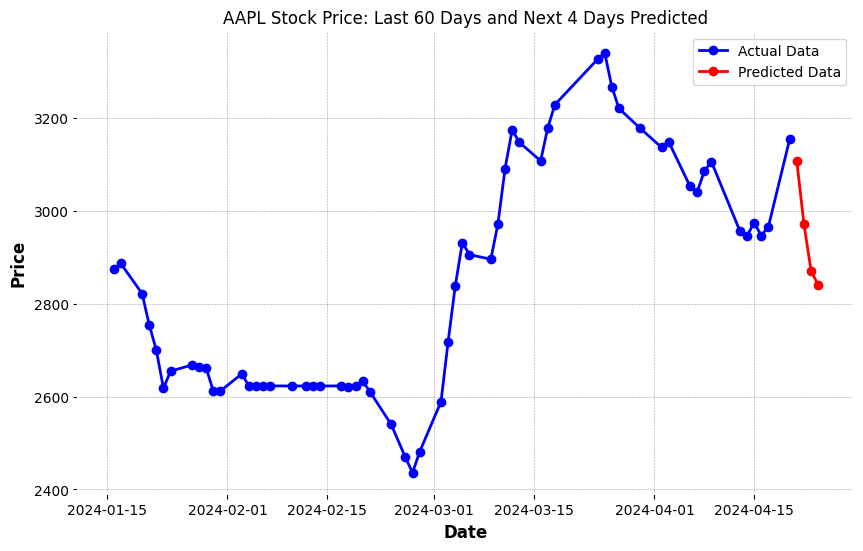

In [ ]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

# Fetch the latest 60 days of AAPL stock data
#data = yf.download('AAPL', period='64d', interval='1d') # Fetch 64 days to display last 60 days in the chart

# Select 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[:60].reshape(1, 60, 1)  # Most recent 60 days

for i in range(4):  # Predicting 4 days
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Adding predictions to the DataFrame
predicted_data = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Combining both actual and predicted data
combined_data = pd.concat([data['Close'], predicted_data['Close']])
combined_data = combined_data[-64:] # Last 60 days of actual data + 4 days of predictions

# Plotting the actual data
plt.figure(figsize=(10,6))
plt.plot(data.index[-60:], data['Close'][-60:], linestyle='-', marker='o', color='blue', label='Actual Data')

# Plotting the predicted data
plt.plot(prediction_dates, predicted_prices, linestyle='-', marker='o', color='red', label='Predicted Data')

plt.title("AAPL Stock Price: Last 60 Days and Next 4 Days Predicted")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()